# Part 2: How factors contribute to bank customer churn?

## 1) Load preprocessed data

In [31]:
import pandas as pd                 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

# read data from csv file
dataset=pd.read_csv('churn.csv') 

# encode categorical data
encoder = LabelEncoder()
dataset["Geography"] = encoder.fit_transform(dataset["Geography"])
dataset["Gender"] = encoder.fit_transform(dataset["Gender"])

In [32]:
# dropping irrelevant features columns (using pandas drop()): rownumber, customerId, and surname
dataset.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace=True)

## 2) What are the main factors, which contribute to bank customer churn?
In this part, I analyzed 10 factcors using correlation matrix, which may contribute to the customer churn. The studied factors include CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary.

Result: All the correlation coefficients between the factors and outcome of churn are small. But of all these factors, four factors (**gender**, **age**, **balance**, **isActiveMember**) show relative strong correlation with the outcome of churn.

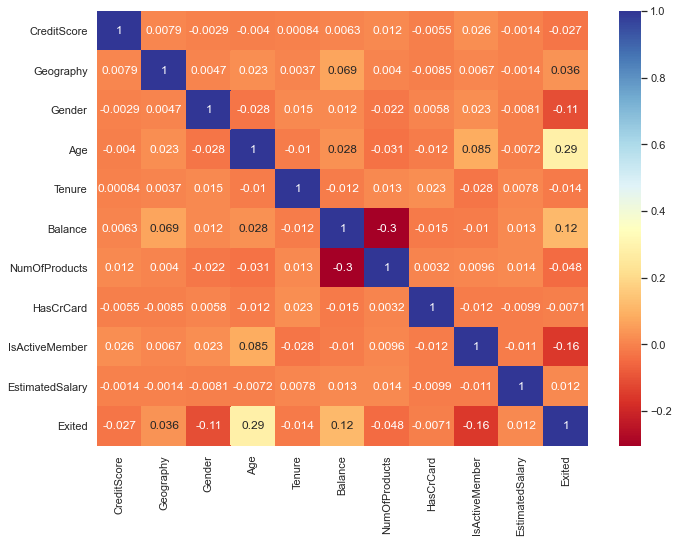

In [33]:
# checking correlation matrix with heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(11,8))
sns.heatmap(dataset.corr(), annot=True, cmap="RdYlBu")
plt.show()

## 3) Take a deep look into how *gender*, *age*, *balance*, and *isActiveMember* affect the outcome of customer churn.

In [34]:
# import data visualization package
import matplotlib.pyplot as plt
import seaborn as sns   #statistical visualization
import plotly.graph_objs as go # visualization
sns.set(palette="Set2")

# read data from csv file
dataset=pd.read_csv('churn.csv') 

### <1> gender vs. churn

In [35]:
dataset["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [36]:
labels = ['Male','Female']
values = dataset["Gender"].value_counts().values.tolist()

fig = go.Figure(data = [go.Pie(labels = labels, values = values)],layout = go.Layout(title = go.layout.Title(text = 'Gender')))
fig.show()

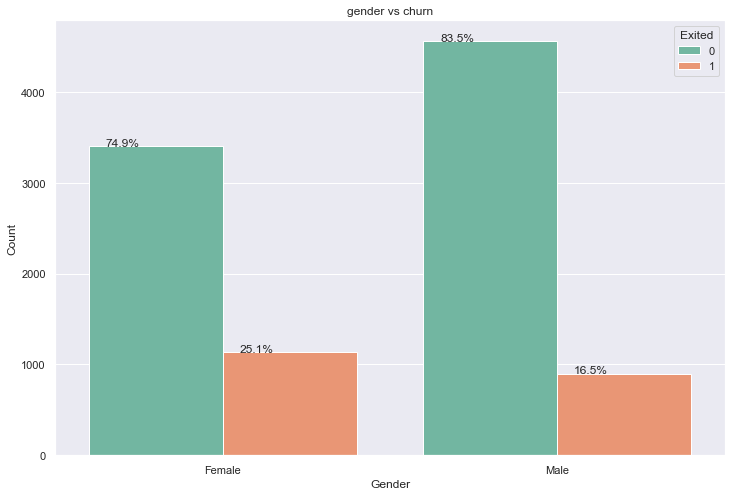

In [37]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    '''
    plot figure about the gender vs churn
    
    Args:
        plot:the counts of male and female exited
        feature:gender
        number_of_categories:2 (female vs male)
        hue_categories:2 (exited vs non-exited)
    
    Returns:
        None
       
    '''
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[(i + 1) % 2]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()


plt.figure(figsize=(12,8))
ax = sns.countplot(x="Gender", hue="Exited",data=dataset)
plt.title('gender vs churn')
plt.xlabel('Gender')
plt.ylabel('Count')

with_hue(ax, dataset.Gender, 2, 2)

### <2> age vs. churn

Text(0, 0.5, 'Frequency')

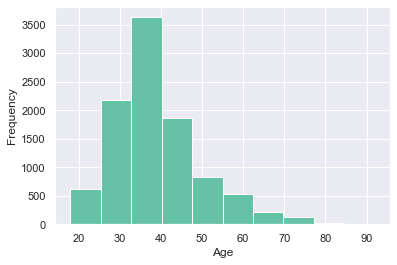

In [38]:
# dataset.groupby('Gender').Age.hist()
dataset.Age.hist()
plt.xlabel('Age')
plt.ylabel('Frequency')

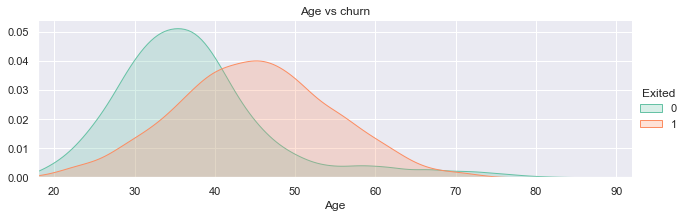

In [39]:
facet = sns.FacetGrid(dataset, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Age",shade= True)
facet.set(xlim=(dataset["Age"].min(), dataset["Age"].max()))
facet.add_legend()
plt.title('Age vs churn')
plt.show()

### <3> balance vs. churn

Text(0, 0.5, 'Frequency')

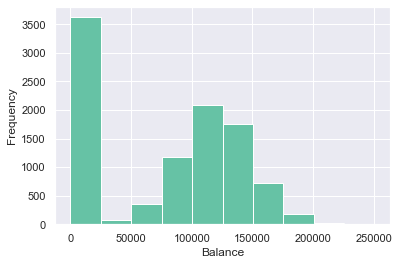

In [40]:
dataset.Balance.hist()
plt.xlabel('Balance')
plt.ylabel('Frequency')

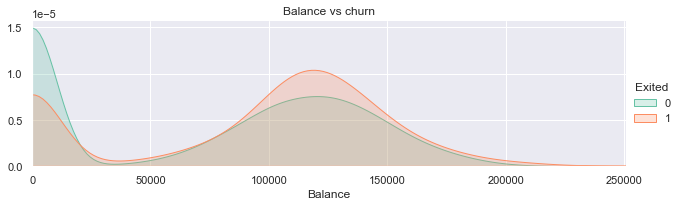

In [41]:
facet = sns.FacetGrid(dataset, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Balance",shade= True)
facet.set(xlim=(0, dataset["Balance"].max()))
facet.add_legend()
plt.title('Balance vs churn')
plt.show()

### <4> isActiveMember vs. churn

In [42]:
dataset["IsActiveMember"].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [43]:
labels = ['Yes','No']
values = dataset["IsActiveMember"].value_counts().values.tolist()

fig = go.Figure(data = [go.Pie(labels = labels, values = values)],layout = go.Layout(title = go.layout.Title(text = 'IsActiveMember')))
fig.show()

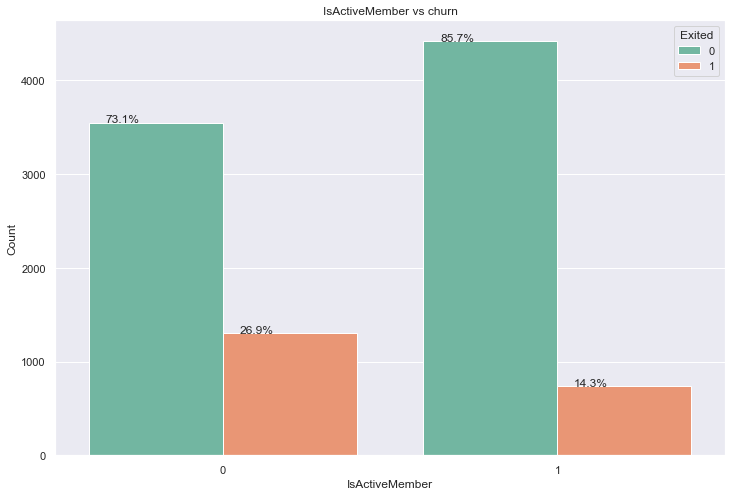

In [44]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="IsActiveMember", hue="Exited",data=dataset)
plt.title('IsActiveMember vs churn')
plt.xlabel('IsActiveMember')
plt.ylabel('Count')

with_hue(ax, dataset.IsActiveMember, 2, 2)